<a href="https://colab.research.google.com/github/mihaipatrascanu/ce888-repo/blob/main/Assigment_1/Assigment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

###Import Dataset

In [ ]:
#Read dataset of kent street
import pandas as pd
df=pd.read_csv("2020-12-kent-street.csv")
df.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,8d4544b7a30f88116299606d164e08462513e8feb8a9ce...,2020-12,Kent Police,Kent Police,-1.459830,53.026488,On or near Farm Close,E01019411,Amber Valley 011B,Violence and sexual offences,Under investigation,NaN
1,adbf054b39875e6fc9f01acf0d48dfbfeed39e372470e7...,2020-12,Kent Police,Kent Police,-0.656614,50.787593,On or near Parking Area,E01031419,Arun 015C,Violence and sexual offences,Under investigation,NaN
2,NaN,2020-12,Kent Police,Kent Police,0.968272,51.255956,On or near Green Lane,E01023987,Ashford 001B,Anti-social behaviour,NaN,NaN
3,NaN,2020-12,Kent Police,Kent Police,0.968272,51.255956,On or near Green Lane,E01023987,Ashford 001B,Anti-social behaviour,NaN,NaN
4,NaN,2020-12,Kent Police,Kent Police,0.962332,51.244504,On or near The Square,E01023987,Ashford 001B,Anti-social behaviour,NaN,NaN


In [ ]:
#check dimension of a dataset
df.shape

(15461, 12)

###Data Cleaning

In [ ]:
#check missing values
df.isnull().sum()

Crime ID                  3508
Month                        0
Reported by                  0
Falls within                 0
Longitude                  170
Latitude                   170
Location                     0
LSOA code                  170
LSOA name                  170
Crime type                   0
Last outcome category     3508
Context                  15461
dtype: int64

In [ ]:
#drop unwanted columns
df1=df.drop(["Context","Crime ID","LSOA name","Location","Month","Reported by","Falls within"],axis=1)
df1.head()

,Longitude,Latitude,LSOA code,Crime type,Last outcome category
0,-1.459830,53.026488,E01019411,Violence and sexual offences,Under investigation
1,-0.656614,50.787593,E01031419,Violence and sexual offences,Under investigation
2,0.968272,51.255956,E01023987,Anti-social behaviour,NaN
3,0.968272,51.255956,E01023987,Anti-social behaviour,NaN
4,0.962332,51.244504,E01023987,Anti-social behaviour,NaN


In [ ]:
#drop missing values columns

df1=df1.dropna()
df2=df1.reset_index(drop=True)
df2.head()

,Longitude,Latitude,LSOA code,Crime type,Last outcome category
0,-1.459830,53.026488,E01019411,Violence and sexual offences,Under investigation
1,-0.656614,50.787593,E01031419,Violence and sexual offences,Under investigation
2,0.962332,51.244504,E01023987,Violence and sexual offences,Further investigation is not in the public int...
3,0.972125,51.243914,E01023987,Violence and sexual offences,Under investigation
4,0.977265,51.224984,E01023988,Other theft,Under investigation


###Data Preprocessing

In [ ]:
#check data types
df2.dtypes

Longitude                float64
Latitude                 float64
LSOA code                 object
Crime type                object
Last outcome category     object
dtype: object

In [ ]:
#Apply label encoding
from sklearn.preprocessing import LabelEncoder
l1=LabelEncoder()
l2=LabelEncoder()
l3=LabelEncoder()

df2['LSOA code']=l1.fit_transform(df2['LSOA code'])
df2['Crime type']=l2.fit_transform(df2['Crime type'])
df2['Last outcome category']=l3.fit_transform(df2['Last outcome category'])
df2.head()

,Longitude,Latitude,LSOA code,Crime type,Last outcome category
0,-1.459830,53.026488,193,12,12
1,-0.656614,50.787593,1034,12,12
2,0.962332,51.244504,214,12,4
3,0.972125,51.243914,214,12,12
4,0.977265,51.224984,215,5,12


###Standardization

In [ ]:
#Apply standarization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc1=sc.fit_transform(df2)
sc_X = pd.DataFrame(data=sc1, columns=df2.columns)
df2=sc_X

###Train Test Split

In [ ]:
#take dependent and independent variables
x=df2.drop(['Last outcome category'],axis=1)
y=df2['Last outcome category']

In [ ]:
#Splitting of a dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

###Support Vector Regression

In [ ]:
#Support Vector Regression
from sklearn.svm import SVR

svr=SVR(kernel='rbf')
svr.fit(x_train,y_train)
predict=svr.predict(x_test)
predict

array([0.42915171, 0.51540527, 0.61095552, ..., 0.60545744, 0.37050653,
       0.28854386])

In [ ]:
#Evaluation metrics of support vector regression
from sklearn.metrics import mean_absolute_error,r2_score
from math import sqrt

print("Mean Absolute Error of SVR:- ",mean_absolute_error(y_test,predict))
print("Root Mean Squared Error of SVR:- ",sqrt(mean_squared_error(y_test,predict)))
print("R2 Square Value of SVR:- ",r2_score(y_test,predict))

Mean Absolute Error of SVR:-  0.7302857781736926
Root Mean Squared Error of SVR:-  1.0807241110157353
R2 Square Value of SVR:-  -0.1499347489872369


###Linear Regression

In [ ]:
#Linear Regression
from sklearn import linear_model
regression = linear_model.LinearRegression() 
regression.fit(x_train,y_train)
y_pred=regression.predict(x_test)
y_pred

array([-0.0265126 , -0.15603072,  0.17140251, ...,  0.15204388,
        0.16799024, -0.21679811])

In [ ]:
#Evaluation metrics of linear regression
from sklearn.metrics import mean_absolute_error,r2_score
from math import sqrt

print("Mean Absolute Error of Linear Regression:- ",mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error of Linear Regression:- ",sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Square Value of Linear Regression:- ",r2_score(y_test,y_pred))

Mean Absolute Error of Linear Regression:-  0.8386692248207804
Root Mean Squared Error of Linear Regression:-  0.9878201249591344
R2 Square Value of Linear Regression:-  0.0392746372599313


###Data Visualization

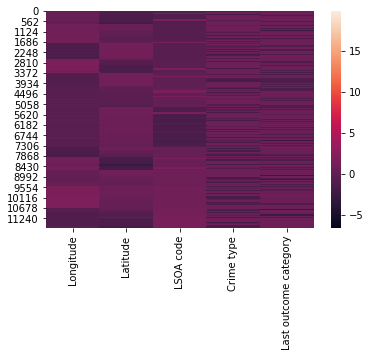

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df2)
plt.show()

In [ ]:
import plotly.express as px
fig = px.density_mapbox(df2, lat=df2['Latitude'], lon=df2['Longitude'], z='Last outcome category', radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="stamen-terrain")
fig.show()

In [ ]:
set(df['Crime type'])

{'Anti-social behaviour',
 'Bicycle theft',
 'Burglary',
 'Criminal damage and arson',
 'Drugs',
 'Other crime',
 'Other theft',
 'Possession of weapons',
 'Public order',
 'Robbery',
 'Shoplifting',
 'Theft from the person',
 'Vehicle crime',
 'Violence and sexual offences'}

In [ ]:
set(df['Last outcome category'])

{'Action to be taken by another organisation',
 'Awaiting court outcome',
 'Formal action is not in the public interest',
 'Further action is not in the public interest',
 'Further investigation is not in the public interest',
 'Investigation complete; no suspect identified',
 'Local resolution',
 'Offender given a caution',
 'Offender given a drugs possession warning',
 'Offender given penalty notice',
 'Suspect charged as part of another case',
 'Unable to prosecute suspect',
 'Under investigation',
 nan}